# Machine Learning Regression Project

### Car Price Prediction Using Linear Regression Algorithm

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore')

In [168]:
Data = pd.read_csv ("G:/cardata.CSV")       # call the file
df = pd.DataFrame (Data)        # cinvert the file to dataframe
df.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0


# Columns :

- Car_Name : Name of The Car

- Year : Year of The Car When it Was Bought

- Selling_Price : Price at Which The Car is Being Sold

- Present_Price : 

- Kms_Driven : Number of Kilometres The Car is Driven

- Fuel_Type : Fuel Type of Car

- Seller_Type : Tells if a Seller is individual or Dealer

- Transmission : Gear Transmission of The Car 

- Owner : Number of Previous Owner of The Car

In [169]:
df.shape

(301, 9)

In [170]:
df.describe (include='all')      # describe the data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [171]:
df.isna().sum()     # check if we have missing values or not

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [173]:
df.duplicated().value_counts()

False    299
True       2
dtype: int64

# preprocessing

- Here get the age of the car from the year of production and replace it
- also remove the car name column

In [174]:
np.max(df['Year'])

2018

In [175]:
Age = 2019 - df['Year']               # determine the age using the year
df.insert (0, 'Age', Age)
del df['Year']                        # delete columns of year and name of car
del df['Car_Name']
df.head(8)

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,1,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,4,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,4,6.50,8.61,33429,Diesel,Dealer,Manual,0


#### To check the noise of numerical data, display the lowest and highest values of each column

- Note that the difference in the number of kilometers traveled cannot be noise

In [176]:
from pandas.api.types import is_numeric_dtype

In [177]:
large = []

for col in df.columns:
    top_values = []
    if is_numeric_dtype(df[col]):
        top_values = df[col].nlargest(n=5)
        large.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
pd.concat(large, axis=1)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
0,16,35.0,92.60,500000,3
1,16,33.0,36.23,213000,1
2,15,23.5,35.96,197176,1
3,14,23.0,35.96,142000,1
4,14,23.0,35.96,135154,1


In [178]:
small = []

for col in df.columns:
    top_values = []
    if is_numeric_dtype(df[col]):
        top_values = df[col].nsmallest(n=5)
        small.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
pd.concat(small, axis=1)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
0,1,0.10,0.32,500,0
1,2,0.12,0.47,500,0
2,2,0.15,0.48,1000,0
3,2,0.16,0.51,1200,0
4,2,0.17,0.51,1300,0


# Type of Columns 


- categorical
- Continuous


## >>> categorical :

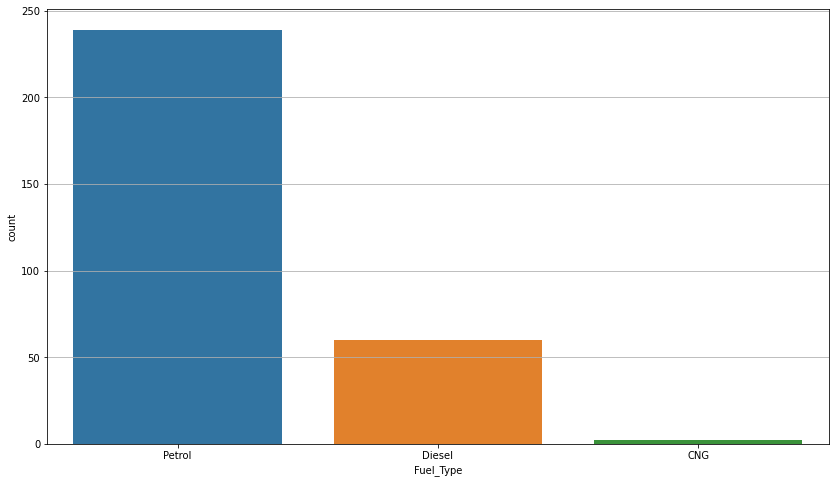

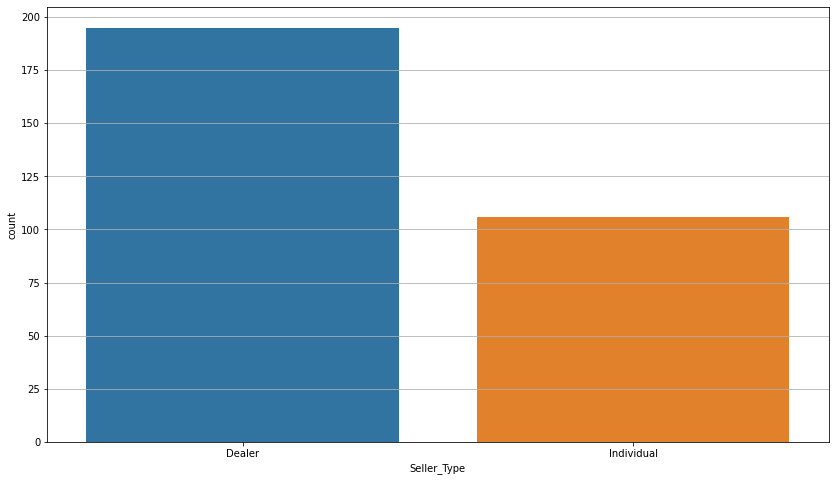

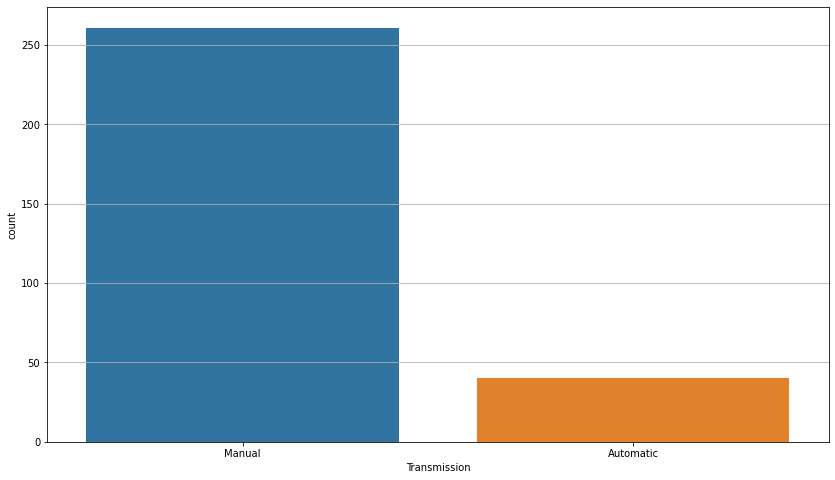

In [179]:
for a in df.columns :
    if is_numeric_dtype(df[a]) == False:
        fig = plt.figure(figsize=(14,8))
        plt.subplot(1,1,1)
        sns.countplot(x=a ,data=df)

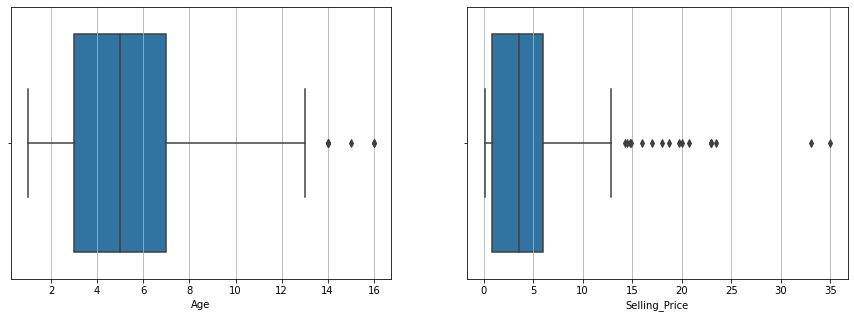

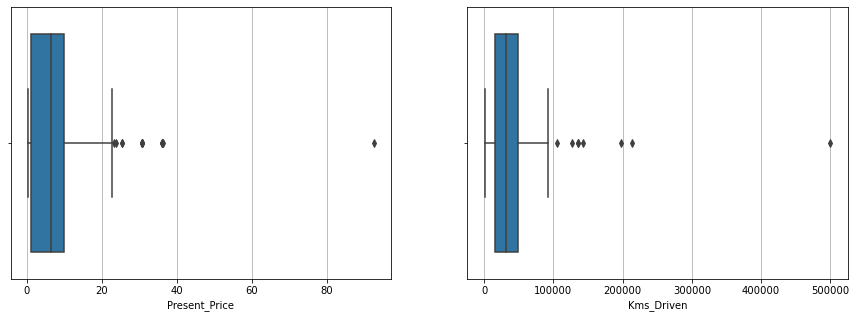

In [180]:
Continuous = ['Age','Selling_Price','Present_Price','Kms_Driven']
i = 0
while i < 4 :
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=Continuous[i] ,data=df)
    i +=1
    plt.subplot(1,2,2)
    sns.boxplot(x=Continuous[i] ,data=df)
    i +=1
    plt.show()

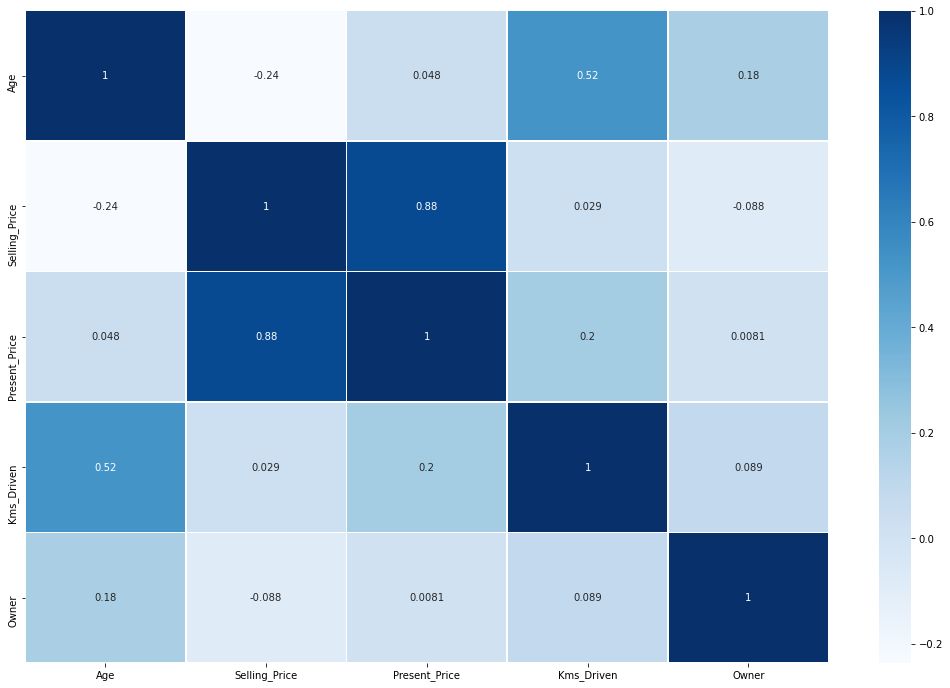

In [181]:
fig , ax = plt.subplots (figsize = (18,12))
sns.heatmap (df.corr(), cmap='Blues', cbar=True, annot=True, linewidths=0.5, ax=ax)
plt.show()

- highest correlation in data is between Selling_Price and Present_Price

### As can be seen, there is a linear relationship between continuous parameters :

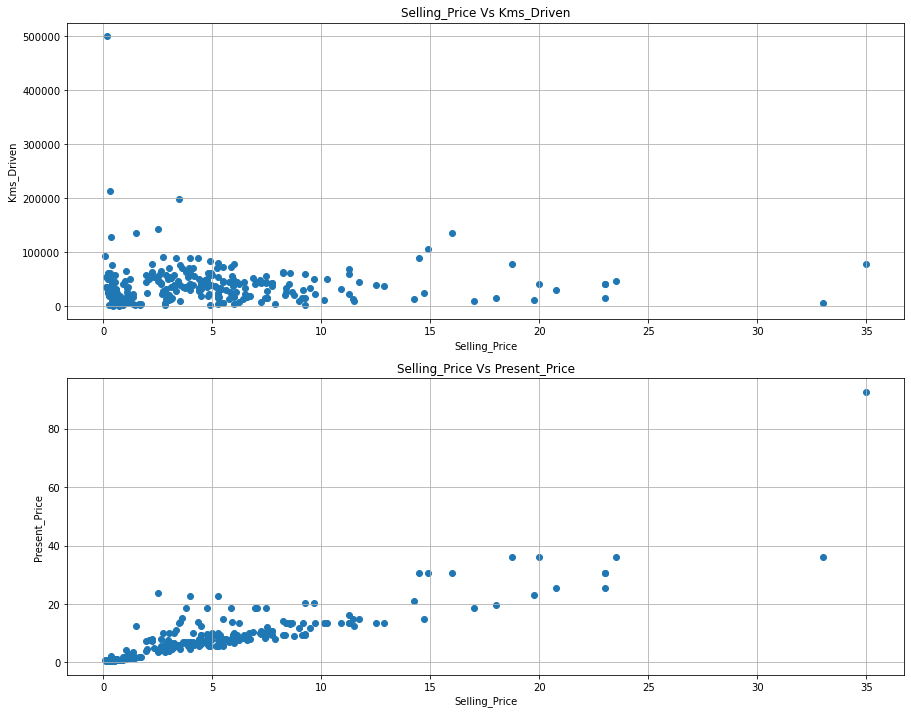

In [182]:
fig ,ax = plt.subplots(2, figsize=(15,12))
plt.rcParams['axes.grid'] = True

ax[0].scatter (df['Selling_Price'],df['Kms_Driven'])
ax[0].set_title ('Selling_Price Vs Kms_Driven')
ax[0].set_xlabel ('Selling_Price')
ax[0].set_ylabel ('Kms_Driven')

ax[1].scatter (df['Selling_Price'],df['Present_Price'])
ax[1].set_title('Selling_Price Vs Present_Price')
ax[1].set_xlabel ('Selling_Price')
ax[1].set_ylabel ('Present_Price')

plt.show()

### Although it was observed in only one example that the car had more than one owner, this sample should be used in the modeling :

<AxesSubplot:xlabel='Owner', ylabel='Present_Price'>

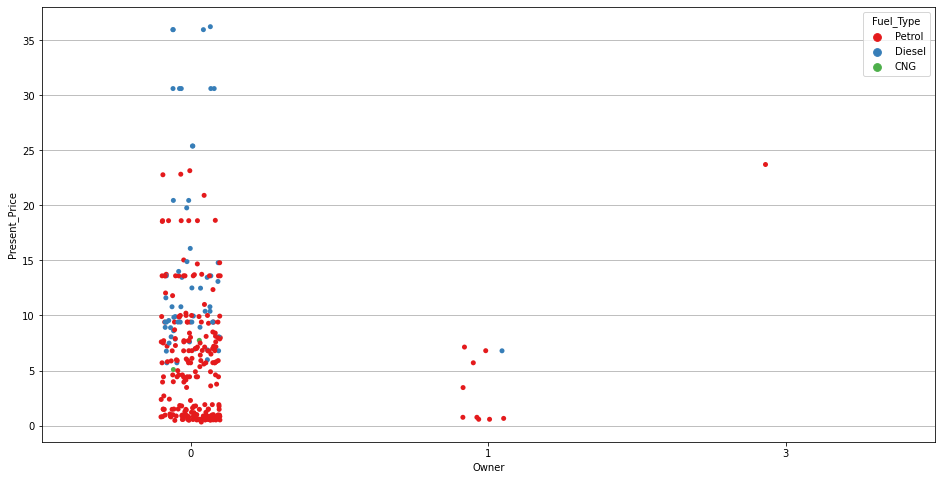

In [183]:
plt.figure(figsize=(16,8))
sns.stripplot(x="Owner",y="Present_Price",data=df[df['Present_Price']<40],jitter=True,hue='Fuel_Type',palette='Set1')

### Because cannot enter text values into the linear equation, we must first convert them into numbers :

In [184]:
def gender_to_numeric(x):               # We write a function that convert str to int
        if x=='Petrol': return 4
        if x=='Diesel':   return 3
        if x=='CNG': return 2
        if x=='Dealer': return 4
        if x=='Individual': return 3
        if x=='Manual': return 4
        if x=='Automatic': return 2

df['Fuel_Type1'] = df['Fuel_Type'].apply(gender_to_numeric)
df['Seller_Type1'] = df['Seller_Type'].apply(gender_to_numeric)
df['Transmission1'] = df['Transmission'].apply(gender_to_numeric)
df.head(8)

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type1,Seller_Type1,Transmission1
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0,4,4,4
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0,3,4,4
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,4,4
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0,4,4,4
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0,3,4,4
5,1,9.25,9.83,2071,Diesel,Dealer,Manual,0,3,4,4
6,4,6.75,8.12,18796,Petrol,Dealer,Manual,0,4,4,4
7,4,6.50,8.61,33429,Diesel,Dealer,Manual,0,3,4,4


In [185]:
del df['Fuel_Type']                  # Clear extra columns
del df['Seller_Type']
del df['Transmission']
df = df[['Age','Selling_Price','Present_Price','Kms_Driven','Fuel_Type1','Seller_Type1','Transmission1','Owner']]
df = df.rename ({'Fuel_Type1':'Fuel_Type', 'Seller_Type1':'Seller_Type', 'Transmission1':'Transmission'}, axis=1)
df.head(8)

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,4,4,4,0
1,6,4.75,9.54,43000,3,4,4,0
2,2,7.25,9.85,6900,4,4,4,0
3,8,2.85,4.15,5200,4,4,4,0
4,5,4.60,6.87,42450,3,4,4,0
5,1,9.25,9.83,2071,3,4,4,0
6,4,6.75,8.12,18796,4,4,4,0
7,4,6.50,8.61,33429,3,4,4,0


# StandardsScaler

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
stdandard_ = StandardScaler ()
df_std = pd.DataFrame (stdandard_.fit_transform (df.values), columns=df.columns)
df_std.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,-0.128897,-0.258416,-0.236215,-0.256224,0.500183,0.737285,0.39148,-0.174501
1,0.217514,0.017481,0.221505,0.155911,-1.852241,0.737285,0.39148,-0.174501
2,-1.168129,0.510154,0.257427,-0.773969,0.500183,0.737285,0.39148,-0.174501
3,0.910335,-0.356950,-0.403079,-0.817758,0.500183,0.737285,0.39148,-0.174501
4,-0.128897,-0.012079,-0.087890,0.141743,-1.852241,0.737285,0.39148,-0.174501


# Creating Model

In [188]:
x = df_std.drop (labels='Selling_Price',axis=1)
y = df_std['Selling_Price'].values.reshape(-1,1)      # choose the data we want to process

In [189]:
x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.19, random_state=0) # split With using the library

In [190]:
regressor = LinearRegression ()     # define the model

In [191]:
regressor.fit (x_train,y_train)           # fit the train and test data

LinearRegression()

In [192]:
y_pred = regressor.predict (x_test)          # We implement the model

In [193]:
print('MAE : ', metrics.mean_absolute_error(y_test,y_pred))     # mean absolute error
print('MSE : ', metrics.mean_squared_error(y_test,y_pred))        # mean squared error
print('RMAE : ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))    # root mean squared error
print('score : ', metrics.r2_score(y_test,y_pred))

MAE :  0.20227983247272524
MSE :  0.0885803704351873
RMAE :  0.44975530288449656
score :  0.913090402904947


### 91% is good but let to improve model

# Improve Model



In [194]:
def Power (Dimention,Testsize) :
    r2 = 0.9130904029049598
    for column in x :
        new_col_name = column + str(Dimention)
        new_col_val = x[column]**Dimention
        x.insert (0, new_col_name, new_col_val)
        x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=Testsize, random_state=0)
        model = LinearRegression ()
        model.fit (x_train,y_train)
        y_pred = model.predict (x_test)
        score = metrics.r2_score (y_test,y_pred)
        if score < r2 :
            x.drop ([new_col_name], axis=1, inplace=True)
        else :
            r2 = score
    print ('Score : ', r2)
Power (2,0.2)

Score :  0.9283922153460124


### 92% its better

In [195]:
x.head(8)

,Owner2,Transmission2,Seller_Type2,Kms_Driven2,Present_Price2,Age2,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.03045,0.153257,0.54359,0.065651,0.055797,0.016614,-0.128897,-0.236215,-0.256224,0.500183,0.737285,0.39148,-0.174501
1,0.03045,0.153257,0.54359,0.024308,0.049064,0.047312,0.217514,0.221505,0.155911,-1.852241,0.737285,0.39148,-0.174501
2,0.03045,0.153257,0.54359,0.599028,0.066269,1.364526,-1.168129,0.257427,-0.773969,0.500183,0.737285,0.39148,-0.174501
3,0.03045,0.153257,0.54359,0.668729,0.162473,0.828710,0.910335,-0.403079,-0.817758,0.500183,0.737285,0.39148,-0.174501
4,0.03045,0.153257,0.54359,0.020091,0.007725,0.016614,-0.128897,-0.087890,0.141743,-1.852241,0.737285,0.39148,-0.174501
5,0.03045,0.153257,0.54359,0.807044,0.065081,2.293831,-1.514540,0.255109,-0.898356,-1.852241,0.737285,0.39148,-0.174501
6,0.03045,0.153257,0.54359,0.218600,0.003244,0.225917,-0.475308,0.056957,-0.467547,0.500183,0.737285,0.39148,-0.174501
7,0.03045,0.153257,0.54359,0.008213,0.012936,0.225917,-0.475308,0.113738,-0.090623,-1.852241,0.737285,0.39148,-0.174501


# Dot Fitures

In [196]:
corr_sel = df.corr()
corr_sel['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Seller_Type      0.550724
Kms_Driven       0.029187
Owner           -0.088344
Age             -0.236141
Transmission    -0.367128
Fuel_Type       -0.509467
Name: Selling_Price, dtype: float64

In [197]:
pres_kms = x['Present_Price'] * x['Kms_Driven']
pres_kms2 = x['Present_Price'] * x['Kms_Driven2']
 
pres_age = x['Present_Price'] * x['Age']
pres_age2 = x['Present_Price'] * x['Age2']

pres2_kms = x['Present_Price2'] * x['Kms_Driven']
pres2_kms2 = x['Present_Price2'] * x['Kms_Driven2']

pres2_age = x['Present_Price2'] * x['Age']
pres2_age2 = x['Present_Price2'] * x['Age2']

kms_age = x['Kms_Driven'] * x['Age']
kms_age2 = x['Kms_Driven'] * x['Age2']

kms2_age = x['Kms_Driven2'] * x['Age']
kms2_age2 = x['Kms_Driven2'] * x['Age2']

In [198]:
x.insert (0, 'pres_kms', pres_kms)
x.insert (0, 'pres_kms2', pres_kms2)

x.insert (0, 'pres_age', pres_age)
x.insert (0, 'pres_age2', pres_age2)
x.insert (0, 'pres2_kms', pres2_kms)
x.insert (0, 'pres2_kms2', pres2_kms2)

x.insert (0, 'pres2_age', pres2_age)
x.insert (0, 'pres2_age2', pres2_age2)

x.insert (0, 'kms_age', kms_age)
x.insert (0, 'kms_age2', kms_age2)

x.insert (0, 'kms2_age', kms2_age)
x.insert (0, 'kms2_age2', kms2_age2)

In [199]:
x.shape

(301, 25)

In [200]:
x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)
model = LinearRegression ()
model.fit (x_train,y_train)
y_pred = model.predict (x_test)
print('score : ', metrics.r2_score(y_test,y_pred))

score :  0.9746655657037958


### 97% Now it's great

In [201]:
print('Intercept :\n',model.intercept_)      # receive the intercept of model
print('Slopes :\n',model.coef_)           # receive the coefficient of model

Intercept :
 [-0.05561762]
Slopes :
 [[-1.05595073e-02  2.35402221e-02  1.23672279e-02 -4.20882153e-03
  -2.99207263e-02  3.08201872e-02  1.16990079e-02 -3.18289532e-02
   5.68557111e-02 -3.69465132e-01  3.34600647e-02 -1.01430415e-01
   6.35669140e-04  9.00197203e-03 -1.67892559e-02  1.34875167e-02
   5.10423844e-02  5.90962315e-02 -3.20158059e-01  8.60663344e-01
  -1.04399018e-01 -9.10821033e-02  2.71213735e-02 -4.16193827e-03
  -1.01753881e-02]]


# Draw the result :

In [202]:
df2 = pd.DataFrame ({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})
df2.head()             # Comparison In between y_test and y_pred

,Actual,Predict
0,0.707223,0.433885
1,-0.820063,-0.791860
2,0.116015,-0.132080
3,0.953559,0.994288
4,2.628647,2.702323


In [203]:
df1 = pd.DataFrame (x_test)        # Here we add y_pred and y_test to sort the data
df1.insert (23, 'y_test', y_test)
df1.insert (24, 'y_pred', y_pred)

In [204]:
df1.sort_values (by='Kms_Driven', inplace=True)   # sort data Based on Kms_Driven

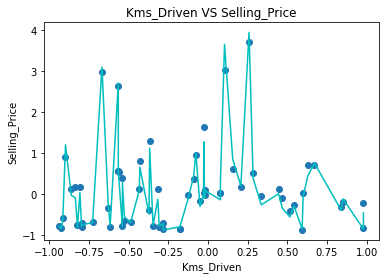

In [205]:
a = df1.Kms_Driven           # show result on scatter plot
b = df1.y_test
c = df1.Kms_Driven
d = df1.y_pred
plt.scatter (a,b)
plt.plot (c,d, color="c")
plt.xlabel ('Kms_Driven')
plt.ylabel ('Selling_Price')
plt.title ('Kms_Driven VS Selling_Price')
plt.grid ()
plt.show()

In [206]:
df1.sort_values (by='Age', inplace=True)      # sort data Based on Age

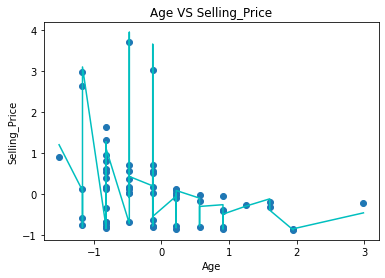

In [207]:
a = df1.Age                    # show result on scatter plot
b = df1.y_test
c = df1.Age
d = df1.y_pred
plt.scatter (a,b)
plt.plot (c,d, color='c')
plt.xlabel ('Age')
plt.ylabel ('Selling_Price')
plt.title ('Age VS Selling_Price')
plt.grid ()
plt.show()

In [208]:
df1.sort_values (by='Present_Price', inplace=True)       # sort data Based on Present_Price

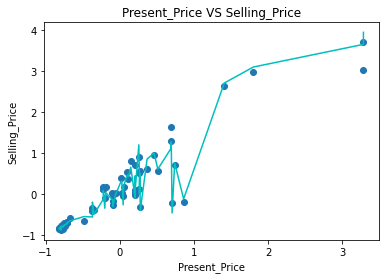

In [209]:
a = df1.Present_Price                 # show result on scatter plot
b = df1.y_test
c = df1.Present_Price
d = df1.y_pred
plt.scatter (a,b)
plt.plot (c,d, color='c')
plt.xlabel ('Present_Price')
plt.ylabel ('Selling_Price')
plt.title ('Present_Price VS Selling_Price')
plt.grid ()
plt.show()

# We can see that the model was able to learn to act on the data well

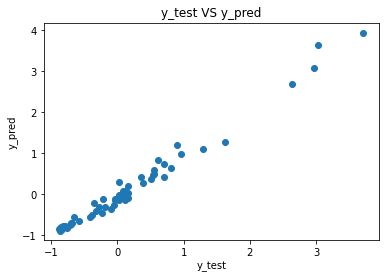

In [215]:
plt.scatter (y_test,y_pred)      # Correlation between y_test and y_pred
plt.xlabel ('y_test')
plt.ylabel ('y_pred')
plt.title ('y_test VS y_pred')
plt.grid ()
plt.show()